In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
dataset = pd.read_csv('C://users//sameer//desktop//datasets//TSLA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,60.540001,60.799999,59.736000,60.287998,60.287998,20693500
1,2017-04-18,59.939999,60.167999,59.580002,60.049999,60.049999,15178500
2,2017-04-19,60.492001,61.324001,60.422001,61.104000,61.104000,19490000
3,2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
4,2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000


In [3]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1.005000e+03
mean,165.685748,169.565471,161.383528,165.827544,165.827544,4.953492e+07
std,205.333952,210.164042,199.584434,205.500918,205.500918,3.155616e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,1.232800e+07
25%,60.020000,61.062000,58.716000,59.936001,59.936001,2.863700e+07
50%,67.991997,69.164001,66.830002,67.919998,67.919998,3.909350e+07
75%,155.442001,159.783997,150.479996,154.255997,154.255997,6.102650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


In [4]:
dataset.shape

(1005, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1005 non-null   object 
 1   Open       1005 non-null   float64
 2   High       1005 non-null   float64
 3   Low        1005 non-null   float64
 4   Close      1005 non-null   float64
 5   Adj Close  1005 non-null   float64
 6   Volume     1005 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


In [6]:
data = dataset.copy()
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace = True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-17,60.540001,60.799999,59.736000,60.287998,60.287998,20693500
2017-04-18,59.939999,60.167999,59.580002,60.049999,60.049999,15178500
2017-04-19,60.492001,61.324001,60.422001,61.104000,61.104000,19490000
2017-04-20,61.301998,61.830002,60.046001,60.501999,60.501999,30747000
2017-04-21,60.400002,61.279999,60.084000,61.119999,61.119999,22549000


In [7]:
final_data = data.drop(columns = ['Open','High','Low','Adj Close','Volume'],axis = 1)
final_data.head()

,Close
Date,
2017-04-17,60.287998
2017-04-18,60.049999
2017-04-19,61.104000
2017-04-20,60.501999
2017-04-21,61.119999


<AxesSubplot:title={'center':'Tesla Stock Closing Prices in past 2 years'}, xlabel='Date', ylabel='Closing Price'>

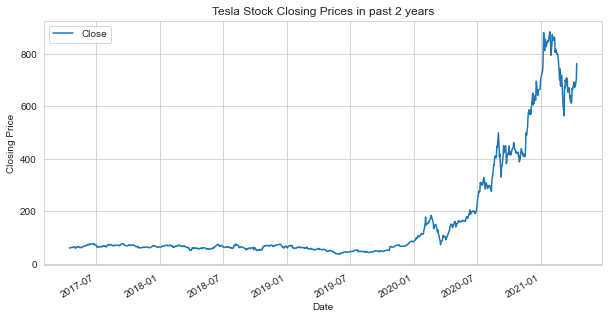

In [8]:
plt.title('Tesla Stock Closing Prices in past 2 years')
plt.xlabel('Date')
plt.ylabel('Closing Price')
final_data.Close.plot(legend = True, figsize = (10,5))

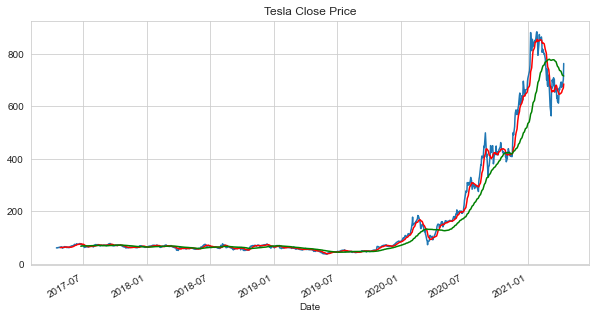

In [9]:
# Smoothing the graph
# Ploting prices with rolling mean
final_data['Close_10'] = final_data['Close'].rolling(10).mean()
final_data['Close_50'] = final_data['Close'].rolling(50).mean()

ax = final_data.Close.plot(x = 'Date', y = 'Close', title = 'Tesla Close Price', figsize = (10,5))
final_data.Close_10.plot(x = 'Date', y = 'Close_10', color = 'r', ax = ax)
final_data.Close_50.plot(x = 'Date', y = 'Close_50', color = 'g', ax = ax)
plt.ioff()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(final_data.Close)

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(final_data.Close)

ADF Test Statistic : 1.0570437390055472
p-value : 0.9948328079255079
#Lags Used : 21
Number of Observations Used : 983
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
final_data['Close First Diff.'] = final_data.Close - final_data.Close.shift(1)
data = final_data.drop(columns = ['Close_10','Close_50'], axis = 1)
data.head()

,Close,Close First Diff.
Date,,
2017-04-17,60.287998,NaN
2017-04-18,60.049999,-0.237999
2017-04-19,61.104000,1.054001
2017-04-20,60.501999,-0.602001
2017-04-21,61.119999,0.618000


In [15]:
adfuller_test(data['Close First Diff.'].dropna())

ADF Test Statistic : -5.675591737020545
p-value : 8.720022461262261e-07
#Lags Used : 20
Number of Observations Used : 983
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

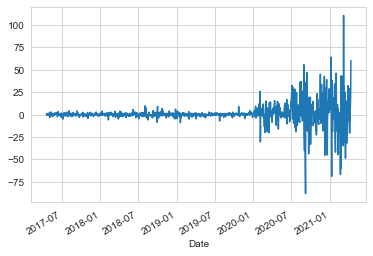

In [16]:
data['Close First Diff.'].plot()

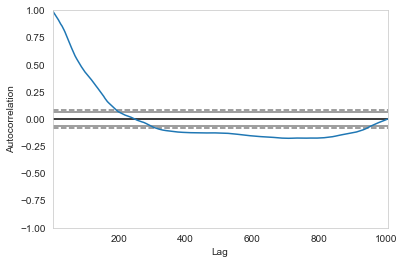

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data.Close)
plt.show()

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

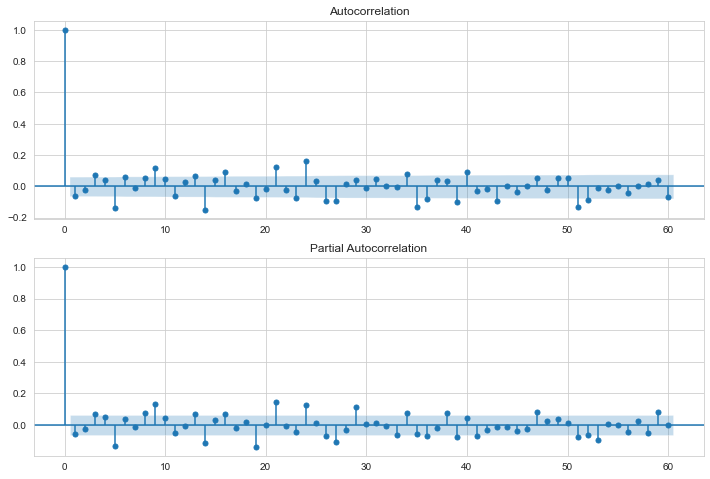

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data['Close First Diff.'].iloc[1:],lags=60,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data['Close First Diff.'].iloc[1:],lags=60,ax=ax2)

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from statsmodels.tsa.arima_model import ARIMA

model=ARIMA(data.Close,order=(6,1,4))
model_fit=model.fit()

In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1004
Model:                 ARIMA(6, 1, 4)   Log Likelihood               -3867.857
Method:                       css-mle   S.D. of innovations             11.247
Date:                Thu, 15 Apr 2021   AIC                           7759.714
Time:                        12:54:48   BIC                           7818.655
Sample:                             1   HQIC                          7782.112
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6046        nan        nan        nan         nan         nan
ar.L1.D.Close    -0.5122    1.7e-06  -3.01e+05      0.000      -0.512      -0.512
ar.L2.D.Close     0.4180        nan        nan        nan         nan         nan
ar.L3.D.Close    -0.4134        nan        nan        nan         nan         nan
ar.L4.D.Close    -0.9649        nan        nan        nan         nan         nan
ar.L5.D.Close    -0.1614   9.04e-07  -1.79e+05      0.000      -0.161      -0.161
ar.L6.D.Close    -0.0501   1.02e-05  -4908.517      0.000      -0.050      -0.050
ma.L1.D.Close     0.4502        nan        nan        nan         nan         nan
ma.L2.D.Close    -0.4852        nan        nan        nan         nan         nan
ma.L3.D.Close     0.4525        nan        nan        nan         nan         nan
ma.L4.D.Close     0.9857        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6966           -0.7174j            1.0000           -0.1273
AR.2            0.6966           +0.7174j            1.0000            0.1273
AR.3           -0.9514           -0.4206j            1.0402           -0.4337
AR.4           -0.9514           +0.4206j            1.0402            0.4337
AR.5           -1.3548           -4.0746j            4.2939           -0.3011
AR.6           -1.3548           +4.0746j            4.2939            0.3011
MA.1            0.6851           -0.7321j            1.0027           -0.1303
MA.2            0.6851           +0.7321j            1.0027            0.1303
MA.3           -0.9147           -0.4152j            1.0045           -0.4322
MA.4           -0.9147           +0.4152j            1.0045            0.4322
-----------------------------------------------------------------------------
"""

In [23]:
df = data.copy()
df.index = [i for i in range(len(data))]
df.head()

,Close,Close First Diff.
0,60.287998,NaN
1,60.049999,-0.237999
2,61.104000,1.054001
3,60.501999,-0.602001
4,61.119999,0.618000


In [24]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [25]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = df.Close[0:7], df.Close[7:15]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order = order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    aic = model_fit.aic
                    error = np.sqrt(mean_squared_error(test,predictions))
                    print('ARIMA%s AIC = %.2f'%(order,aic))
                except:
                    continue

In [ ]:
train,test = df.Close[0:700], df.Close[700:]
train